# Waterfall Checkpoint Demo
#### Team: IBM (Itty Bitty Money)
- Patrick Handley
- Bhargavi Madhunala
- Matt Maffa
- Antonino Tan-Marcello

Date: 10-05-2017

This notebook is used for our waterfall checkpoint presentation demo.

### Dependencies
- [Python3](https://www.python.org/downloads/)
- [Pandas](https://pandas.pydata.org/getpandas.html)
- [Numpy](http://www.numpy.org)
- [Matplotlib](https://matplotlib.org)
- [Seaborn](https://seaborn.pydata.org)

In [11]:
import numpy as np # Linear Alg
import pandas as pd # CSV file I/O & data processing

# Visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import warnings 
from matplotlib import style
from matplotlib.finance import candlestick_ohlc
warnings.filterwarnings("ignore")
style.use('ggplot')

%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 8.0)

from subprocess import check_output

### Dataset
We are using the [Cryptocurrency Historical Prices dataset](https://www.kaggle.com/sudalairajkumar/cryptocurrencypricehistory/data) from Kaggle.

In [2]:
data_dir = '../../input'
# Check what files our dataset contain
print('Our dataset contains the following files: \n')
print(check_output(["ls", data_dir]).decode("utf8"))

Our dataset contains the following files: 

bitcoin_cash_price.csv
bitcoin_dataset.csv
bitcoin_price.csv
bitconnect_price.csv
dash_price.csv
ethereum_classic_price.csv
ethereum_dataset.csv
ethereum_price.csv
iota_price.csv
litecoin_price.csv
monero_price.csv
nem_price.csv
neo_price.csv
numeraire_price.csv
omisego_price.csv
qtum_price.csv
ripple_price.csv
stratis_price.csv
waves_price.csv



### Bitcoin
We will explore the bitcoin data for the purpose of a demo.

In [24]:
# Reading in bitcoin price file
bitcoin_price = pd.read_csv('{}/bitcoin_price.csv'.format(data_dir), parse_dates=['Date'], index_col=0)
bitcoin_price.dtypes

Open          float64
High          float64
Low           float64
Close         float64
Volume         object
Market Cap     object
dtype: object

In [4]:
# Lets look at the first 10 rows
bitcoin_price.head(10)

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2017-09-05,4228.29,4427.84,3998.11,4376.53,"2,697,970,000","69,954,400,000"
2017-09-04,4591.63,4591.63,4108.40,4236.31,"2,987,330,000","75,955,500,000"
2017-09-03,4585.27,4714.08,4417.59,4582.96,"1,933,190,000","75,841,700,000"
2017-09-02,4901.42,4975.04,4469.24,4578.77,"2,722,140,000","81,060,600,000"
2017-09-01,4701.76,4892.01,4678.53,4892.01,"2,599,080,000","77,748,400,000"
2017-08-31,4555.59,4736.05,4549.40,4703.39,"1,944,930,000","75,322,300,000"
2017-08-30,4570.36,4626.52,4471.41,4565.30,"1,937,850,000","75,556,600,000"
2017-08-29,4389.21,4625.68,4352.13,4579.02,"2,486,080,000","72,553,800,000"
2017-08-28,4384.45,4403.93,4224.64,4382.66,"1,959,330,000","72,467,900,000"


In [5]:
bitcoin_price.tail(10)

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-05-07,112.25,113.44,97.70,111.50,-,"1,248,470,000"
2013-05-06,115.98,124.66,106.64,112.30,-,"1,289,470,000"
2013-05-05,112.90,118.80,107.14,115.91,-,"1,254,760,000"
2013-05-04,98.10,115.00,92.50,112.50,-,"1,089,890,000"
2013-05-03,106.25,108.13,79.10,97.75,-,"1,180,070,000"
2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"


In [6]:
print('Date of newest data: {}'.format(bitcoin_price.index[0]))
print('Date of oldest data: {}'.format(bitcoin_price.index[-1]))

Date of newest data: 2017-09-05 00:00:00
Date of oldest data: 2013-04-28 00:00:00


In [25]:
btc_ohlc = ['Open', 'High', 'Low', 'Close']

for feat in btc_ohlc:
    print('---------------------------------------------')
    print('Statistics for Bitcoin {} values:'.format(feat))
    print(bitcoin_price[feat].describe())

---------------------------------------------
Statistics for Bitcoin Open values:
count    1592.000000
mean      658.283649
std       723.653014
min        68.500000
25%       258.350000
50%       444.885000
75%       680.187500
max      4901.420000
Name: Open, dtype: float64
---------------------------------------------
Statistics for Bitcoin High values:
count    1592.000000
mean      676.271727
std       749.473657
min        74.560000
25%       263.930000
50%       450.605000
75%       703.960000
max      4975.040000
Name: High, dtype: float64
---------------------------------------------
Statistics for Bitcoin Low values:
count    1592.000000
mean      641.050616
std       699.635365
min        65.530000
25%       253.177500
50%       437.180000
75%       660.775000
max      4678.530000
Name: Low, dtype: float64
---------------------------------------------
Statistics for Bitcoin Close values:
count    1592.000000
mean      660.837795
std       729.447612
min        68.430000
25% 

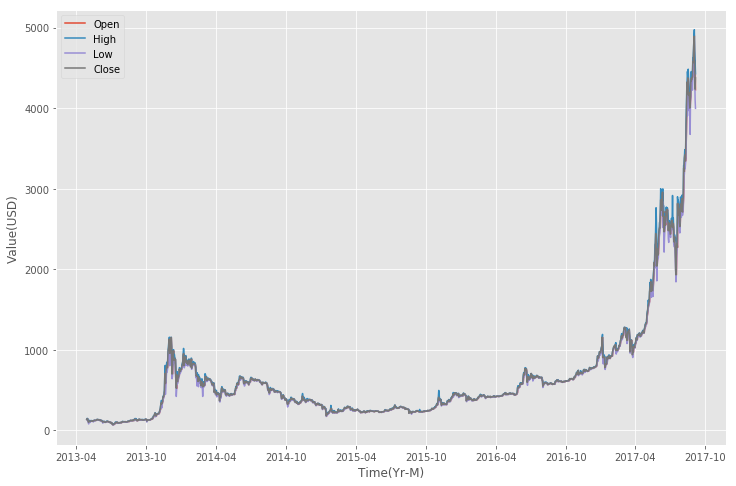

In [26]:
# Lets plot the Open, Close, High, Low values on a line plot
for feat in btc_ohlc:
    plt.plot(bitcoin_price[feat], label=feat)

plt.xlabel('Time(Yr-M)')
plt.ylabel('Value(USD)')
plt.legend()
plt.show()

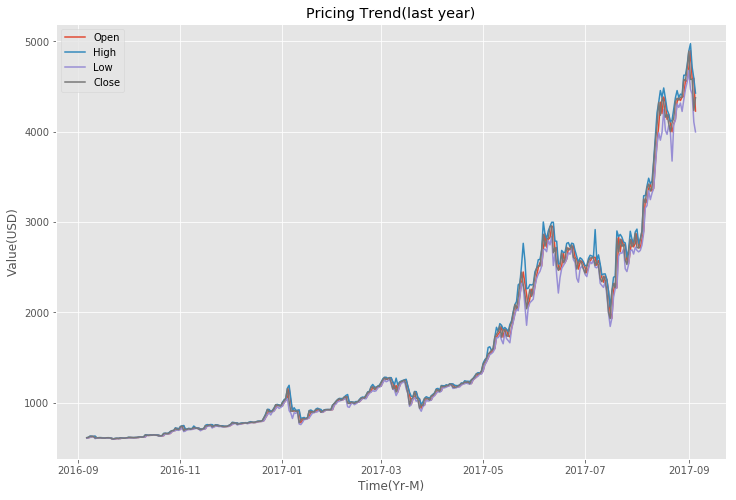

In [27]:
# Lets looks at the more recent data
n_days = 365 # number of recent days

for feature in btc_ohlc:
    plt.plot(bitcoin_price[feature].iloc[:n_days], label=feature)

plt.title('Pricing Trend(last year)')
plt.xlabel('Time(Yr-M)')
plt.ylabel('Value(USD)')
plt.legend()
plt.show()

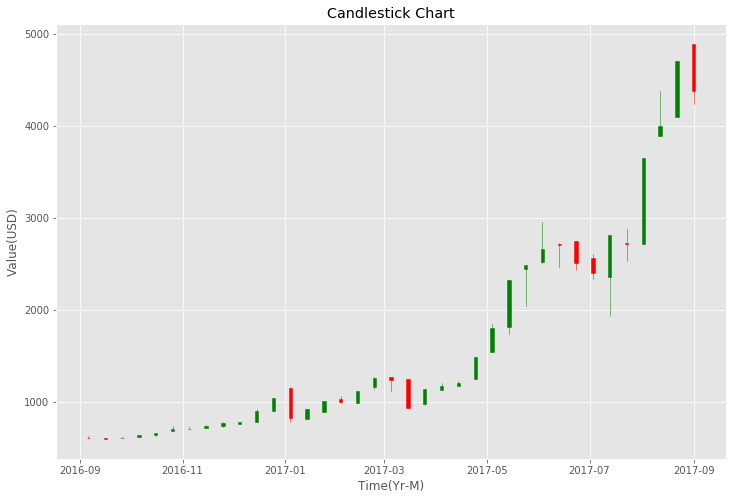

In [29]:
# Candlestick graph for Bitcoin Closing Price
btc_close_ohlc = bitcoin_price['Close'][:n_days].resample('10D').ohlc()
btc_close_ohlc.reset_index(inplace=True)
btc_close_ohlc['Date'] = btc_close_ohlc['Date'].map(mdates.date2num)

fig, ax = plt.subplots()

candlestick_ohlc(ax, btc_close_ohlc.values, width=2, colorup='g')
ax.xaxis_date()

plt.title('Candlestick Chart')
plt.xlabel('Time(Yr-M)')
plt.ylabel('Value(USD)')
plt.legend()
plt.show()